In [1]:
import os 
import csv 
import pandas as pd 

#### Reading in the df and looking at the first 5 rows 

In [2]:
death_row = pd.read_csv("death_row_final_project.csv")
death_row.head()

execution   last_name first_name age_received education_level age_crime  \
0        566        Hall     Justen           23               9        21   
1        565      Sparks     Robert           34               8        33   
2        564       Soliz       Mark           30               8        28   
3        563  Crutsinger      Billy           49              11        48   
4        562  Swearingen      Larry           29              11        27   

         occupation prior_record num_of_vic          main_crime  ... vic_kid  \
0           laborer          yes          1              murder  ...       0   
1  machine operator          yes          3              murder  ...       2   
2     cabinet maker          yes          1     murder, robbery  ...       0   
3           laborer          yes          2              murder  ...       0   
4           laborer          yes          1  murder, kidnapping  ...       0   

  vic_male vic_female vic_police inmate_number age date_executed      race  \
0        0          1        no         999497  38     11/6/2019    White    
1        2          1         no        999542  45     9/25/2019     Black   
2        0          1         no        999571  37     9/10/2019  Hispanic   
3        0          2        no         999459  64      9/4/2019     White   
4        0          1        no         999361  48     8/21/2019     White   

       county                                     last_statement  
0     El Paso  Yeah, I want to  address the Roundtree family ...  
1      Dallas  Umm, Pamela can you  hear me Stephanie, Hardy,...  
2     Johnson  It's 6:09 on  September 10th, Kayla and David,...  
3     Tarrant  Hi ladies I wanted to  tell ya'll how much I l...  
4  Montgomery  Lord forgive them.  They don't know what they ...  

[5 rows x 24 columns]

In [3]:
# getting the shape of the df 
death_row.shape

(566, 24)

In [4]:
#looking at descriptive stats for the numeric columns
death_row.describe()

execution  inmate_number         age
count   566.0000     566.000000  566.000000
mean    283.5000  531777.630742   39.726148
std     163.5344  498661.405354    8.828008
min       1.0000     511.000000   24.000000
25%     142.2500     819.250000   33.000000
50%     283.5000  999033.000000   38.000000
75%     424.7500  999269.750000   45.000000
max     566.0000  999571.000000   70.000000

In [5]:
#looking at the data types for each column in the df 
death_row.dtypes

execution           int64
last_name          object
first_name         object
age_received       object
education_level    object
age_crime          object
occupation         object
prior_record       object
num_of_vic         object
main_crime         object
type_of_crime      object
weapon             object
co_defendants      object
race_vic           object
vic_kid            object
vic_male           object
vic_female         object
vic_police         object
inmate_number       int64
age                 int64
date_executed      object
race               object
county             object
last_statement     object
dtype: object

### Things I want to change: 
1. age_received, age-crime, num_of_vic, vic_kid, vic_male, vic_female need to be changed to int 
2. education level might make sense to discretize 
3. occupation, main_crime, type_of_crime, weapon, race_vic, race, county, late_name, first_name, prior_record, vic_police boolean turn to a factor
4. can remove execution, date_executed and inmate_number as it serves no useful purpose and is unique to each prisoner 

In [6]:
# looking at the values for age_received to ensure all are numeric.
death_row.age_received.value_counts()

23         43
20         38
21         37
25         34
24         31
29         29
19         28
22         28
27         25
30         22
26         22
31         21
32         21
28         19
38         17
36         17
33         14
40         14
35         14
34         13
39         13
18         11
37          9
45          5
43          5
41          4
46          4
49          4
42          3
51          3
44          3
47          3
53          3
48          2
unknown     2
52          1
54          1
50          1
17          1
57          1
Name: age_received, dtype: int64

In [7]:
# need to remove unknown to n/a for all the columns that I want to change to numeric. 
numeric_columns = ["age_received", "age_crime", "num_of_vic", "vic_kid", "vic_male", "vic_female", "co_defendants"]

for column in numeric_columns: 
    death_row[column] = death_row[column].str.replace("unknown", "")

In [8]:
# checking to make sure that worked... 
death_row.age_received.value_counts()

23    43
20    38
21    37
25    34
24    31
29    29
19    28
22    28
27    25
30    22
26    22
31    21
32    21
28    19
38    17
36    17
33    14
40    14
35    14
34    13
39    13
18    11
37     9
45     5
43     5
41     4
46     4
49     4
42     3
51     3
44     3
47     3
53     3
48     2
       2
52     1
54     1
50     1
17     1
57     1
Name: age_received, dtype: int64

In [9]:
death_row[numeric_columns] = death_row[numeric_columns].apply(pd.to_numeric) #changes everything to float

In [10]:
death_row.head()

execution   last_name first_name  age_received education_level  age_crime  \
0        566        Hall     Justen          23.0               9       21.0   
1        565      Sparks     Robert          34.0               8       33.0   
2        564       Soliz       Mark          30.0               8       28.0   
3        563  Crutsinger      Billy          49.0              11       48.0   
4        562  Swearingen      Larry          29.0              11       27.0   

         occupation prior_record  num_of_vic          main_crime  ... vic_kid  \
0           laborer          yes         1.0              murder  ...     0.0   
1  machine operator          yes         3.0              murder  ...     2.0   
2     cabinet maker          yes         1.0     murder, robbery  ...     0.0   
3           laborer          yes         2.0              murder  ...     0.0   
4           laborer          yes         1.0  murder, kidnapping  ...     0.0   

  vic_male  vic_female vic_police  inmate_number  age  date_executed  \
0      0.0         1.0        no          999497   38      11/6/2019   
1      2.0         1.0         no         999542   45      9/25/2019   
2      0.0         1.0         no         999571   37      9/10/2019   
3      0.0         2.0        no          999459   64       9/4/2019   
4      0.0         1.0        no          999361   48      8/21/2019   

       race      county                                     last_statement  
0    White      El Paso  Yeah, I want to  address the Roundtree family ...  
1     Black      Dallas  Umm, Pamela can you  hear me Stephanie, Hardy,...  
2  Hispanic     Johnson  It's 6:09 on  September 10th, Kayla and David,...  
3     White     Tarrant  Hi ladies I wanted to  tell ya'll how much I l...  
4     White  Montgomery  Lord forgive them.  They don't know what they ...  

[5 rows x 24 columns]

In [11]:
# I do not want to see the decimal places in the columns 
pd.options.display.float_format = "{:,.0f}".format

## Replacing all missing values with the mean of each column

In [12]:
for column in numeric_columns: 
    print("The number of missing values in", column, "is", death_row[column].isna().sum())
    death_row[column] = death_row[column].fillna(death_row[column].mean())
    print("Now the number of missing values in", column, "is", death_row[column].isna().sum())

The number of missing values in age_received is 2
Now the number of missing values in age_received is 0
The number of missing values in age_crime is 2
Now the number of missing values in age_crime is 0
The number of missing values in num_of_vic is 1
Now the number of missing values in num_of_vic is 0
The number of missing values in vic_kid is 1
Now the number of missing values in vic_kid is 0
The number of missing values in vic_male is 2
Now the number of missing values in vic_male is 0
The number of missing values in vic_female is 2
Now the number of missing values in vic_female is 0
The number of missing values in co_defendants is 1
Now the number of missing values in co_defendants is 0


In [13]:
death_row.head()

execution   last_name first_name  age_received education_level  age_crime  \
0        566        Hall     Justen            23               9         21   
1        565      Sparks     Robert            34               8         33   
2        564       Soliz       Mark            30               8         28   
3        563  Crutsinger      Billy            49              11         48   
4        562  Swearingen      Larry            29              11         27   

         occupation prior_record  num_of_vic          main_crime  ... vic_kid  \
0           laborer          yes           1              murder  ...       0   
1  machine operator          yes           3              murder  ...       2   
2     cabinet maker          yes           1     murder, robbery  ...       0   
3           laborer          yes           2              murder  ...       0   
4           laborer          yes           1  murder, kidnapping  ...       0   

  vic_male  vic_female vic_police  inmate_number  age  date_executed  \
0        0           1        no          999497   38      11/6/2019   
1        2           1         no         999542   45      9/25/2019   
2        0           1         no         999571   37      9/10/2019   
3        0           2        no          999459   64       9/4/2019   
4        0           1        no          999361   48      8/21/2019   

       race      county                                     last_statement  
0    White      El Paso  Yeah, I want to  address the Roundtree family ...  
1     Black      Dallas  Umm, Pamela can you  hear me Stephanie, Hardy,...  
2  Hispanic     Johnson  It's 6:09 on  September 10th, Kayla and David,...  
3     White     Tarrant  Hi ladies I wanted to  tell ya'll how much I l...  
4     White  Montgomery  Lord forgive them.  They don't know what they ...  

[5 rows x 24 columns]

### Discretizing education level 

In [14]:
death_row.education_level.value_counts()

12         110
11          75
10          75
9           72
ged         63
8           50
unknown     41
7           27
14          17
6            9
13           8
15           5
5            4
16           4
3            2
12.5         1
0            1
college      1
4            1
Name: education_level, dtype: int64

For discretizing, anything above 12 will be changed to college, 12 and ged will be changed to highschool, 9 - 11 to some highschool, less than 9 is not highschool

In [15]:
def replace_items_in_column_from_list(a_list_of_items_to_replace, df, column, word_to_be_changed_to):
    for item in a_list_of_items_to_replace: 
        df[column] = df[column].str.replace(item, word_to_be_changed_to)
    return df[column]

In [16]:
high_school = ["12", "ged"]
some_highschool = ["11", "10", "9"]
no_highschool = ["8", "7", "6", "5", "4", "3", "2", "1", "0"]
college = ["13", "14", "15", "12.5", "16"]
death_row["education_level"] = replace_items_in_column_from_list(college, death_row, "education_level", "college")
death_row["education_level"] = replace_items_in_column_from_list(high_school, death_row, "education_level", "highschool")
death_row["education_level"] = replace_items_in_column_from_list(some_highschool, death_row, "education_level", "some_highschool")
death_row["education_level"] = replace_items_in_column_from_list(no_highschool, death_row, "education_level", "no_highschool")
death_row.education_level.value_counts()

some_highschool    222
highschool         173
no_highschool       94
unknown             41
college             36
Name: education_level, dtype: int64

In [17]:
#Changing the education level to an ordered category 
cat = ["unknown", "no_highschool", "some_highschool", "highschool", "college"]
#Changing the month data type from int to ordered category 
death_row["education_level"] = pd.Categorical(death_row["education_level"], ordered = True, categories = cat)
#Checking to see if it worked 
death_row.education_level.dtype

CategoricalDtype(categories=['unknown', 'no_highschool', 'some_highschool', 'highschool',
                  'college'],
                 ordered=True)

In [18]:
death_row.head()

execution   last_name first_name  age_received  education_level  age_crime  \
0        566        Hall     Justen            23  some_highschool         21   
1        565      Sparks     Robert            34    no_highschool         33   
2        564       Soliz       Mark            30    no_highschool         28   
3        563  Crutsinger      Billy            49  some_highschool         48   
4        562  Swearingen      Larry            29  some_highschool         27   

         occupation prior_record  num_of_vic          main_crime  ... vic_kid  \
0           laborer          yes           1              murder  ...       0   
1  machine operator          yes           3              murder  ...       2   
2     cabinet maker          yes           1     murder, robbery  ...       0   
3           laborer          yes           2              murder  ...       0   
4           laborer          yes           1  murder, kidnapping  ...       0   

  vic_male  vic_female vic_police  inmate_number  age  date_executed  \
0        0           1        no          999497   38      11/6/2019   
1        2           1         no         999542   45      9/25/2019   
2        0           1         no         999571   37      9/10/2019   
3        0           2        no          999459   64       9/4/2019   
4        0           1        no          999361   48      8/21/2019   

       race      county                                     last_statement  
0    White      El Paso  Yeah, I want to  address the Roundtree family ...  
1     Black      Dallas  Umm, Pamela can you  hear me Stephanie, Hardy,...  
2  Hispanic     Johnson  It's 6:09 on  September 10th, Kayla and David,...  
3     White     Tarrant  Hi ladies I wanted to  tell ya'll how much I l...  
4     White  Montgomery  Lord forgive them.  They don't know what they ...  

[5 rows x 24 columns]

### Changing the other columns that should be a category (factor)

In [19]:
def cat_fun(df, column): 
    df[column] = df[column].astype("category") 
    return(df[column])

In [20]:
category_columns = ["occupation", "main_crime", "type_of_crime", "weapon", "race", "race_vic", "county", "last_name", "first_name", "prior_record", "vic_police"]
for column in category_columns: 
    death_row[column] = cat_fun(death_row, column)

In [21]:
#Checking the data types
death_row.dtypes

execution             int64
last_name          category
first_name         category
age_received        float64
education_level    category
age_crime           float64
occupation         category
prior_record       category
num_of_vic          float64
main_crime         category
type_of_crime      category
weapon             category
co_defendants       float64
race_vic           category
vic_kid             float64
vic_male            float64
vic_female          float64
vic_police         category
inmate_number         int64
age                   int64
date_executed        object
race               category
county             category
last_statement       object
dtype: object

### Removing execution and inmate number 

In [22]:
death_row.drop(["execution", "inmate_number", "date_executed"], axis = 1, inplace = True)
death_row.head()

last_name first_name  age_received  education_level  age_crime  \
0        Hall     Justen            23  some_highschool         21   
1      Sparks     Robert            34    no_highschool         33   
2       Soliz       Mark            30    no_highschool         28   
3  Crutsinger      Billy            49  some_highschool         48   
4  Swearingen      Larry            29  some_highschool         27   

         occupation prior_record  num_of_vic          main_crime  \
0           laborer          yes           1              murder   
1  machine operator          yes           3              murder   
2     cabinet maker          yes           1     murder, robbery   
3           laborer          yes           2              murder   
4           laborer          yes           1  murder, kidnapping   

  type_of_crime  ... co_defendants  race_vic vic_kid  vic_male  vic_female  \
0    strangling  ...             0    unkown       0         0           1   
1      stabbing  ...             0     black       2         2           1   
2     shooting   ...             1     white       0         0           1   
3      stabbing  ...             0     white       0         0           2   
4    strangling  ...             0     white       0         0           1   

   vic_police age      race      county  \
0         no   38    White      El Paso   
1          no  45     Black      Dallas   
2          no  37  Hispanic     Johnson   
3         no   64     White     Tarrant   
4         no   48     White  Montgomery   

                                      last_statement  
0  Yeah, I want to  address the Roundtree family ...  
1  Umm, Pamela can you  hear me Stephanie, Hardy,...  
2  It's 6:09 on  September 10th, Kayla and David,...  
3  Hi ladies I wanted to  tell ya'll how much I l...  
4  Lord forgive them.  They don't know what they ...  

[5 rows x 21 columns]

### Aggregating a column: time_on_death_row

In [23]:
death_row["time_spent"] = death_row["age"] - death_row["age_received"]

In [24]:
looking = death_row[death_row["time_spent"] == 1]
looking
#double checking that the data is correct, as 1 year is a small amount of time spent on death row. 
#There were a few records that were incorrect based on data entry from the website we scraped. Those records were updated. 

last_name   first_name  age_received  education_level  age_crime  \
153      Rodriguez      Michael            39       highschool         40   
184          Swift  Christopher            30  some_highschool         28   
344         Graham         Gary            38  some_highschool         18   
392          Foust        Aaron            25       highschool         24   
420         Renfro       Steven            39          unknown         38   
459  Gonzales, Jr.          Joe            35       highschool         31   

       occupation prior_record  num_of_vic                  main_crime  \
153       laborer          yes           1              murder, escape   
184       laborer          yes           2                      murder   
344       laborer           no           1             murder, robbery   
392       laborer           no           1  murder, car theft, robbery   
420       laborer           no           4                      murder   
459  construction          yes           1             murder, robbery   

    type_of_crime  ... race_vic  vic_kid vic_male  vic_female  vic_police  \
153      shooting  ...    white        0        1           0         yes   
184    strangling  ...    white        0        0           2         no    
344      shooting  ...    white        0        1           0         no    
392    strangling  ...    white        0        1           0         no    
420      shooting  ...    white        0        2           2         yes   
459      shooting  ...    white        0        1           0         no    

     age      race    county  \
153   40  Hispanic    Dallas   
184   31     White    Denton   
344   39     Black    Harris   
392   26     White   Tarrant   
420   40     White  Harrison   
459   36  Hispanic    Potter   

                                        last_statement time_spent  
153   Yes I do, I know this no way makes up for all...          1  
184  This offender declined to make a last statemen...          1  
344   I would like to say that I did not kill Bobby...          1  
392  Adios, amigos, I'll see ya'll on the other sid...          1  
420  I would like to tell the victims' families tha...          1  
459  There are people all over the world who face t...          1  

[6 rows x 22 columns]

In [25]:
death_row.head()

last_name first_name  age_received  education_level  age_crime  \
0        Hall     Justen            23  some_highschool         21   
1      Sparks     Robert            34    no_highschool         33   
2       Soliz       Mark            30    no_highschool         28   
3  Crutsinger      Billy            49  some_highschool         48   
4  Swearingen      Larry            29  some_highschool         27   

         occupation prior_record  num_of_vic          main_crime  \
0           laborer          yes           1              murder   
1  machine operator          yes           3              murder   
2     cabinet maker          yes           1     murder, robbery   
3           laborer          yes           2              murder   
4           laborer          yes           1  murder, kidnapping   

  type_of_crime  ... race_vic  vic_kid vic_male  vic_female  vic_police  age  \
0    strangling  ...   unkown        0        0           1         no    38   
1      stabbing  ...    black        2        2           1          no   45   
2     shooting   ...    white        0        0           1          no   37   
3      stabbing  ...    white        0        0           2         no    64   
4    strangling  ...    white        0        0           1         no    48   

       race      county                                     last_statement  \
0    White      El Paso  Yeah, I want to  address the Roundtree family ...   
1     Black      Dallas  Umm, Pamela can you  hear me Stephanie, Hardy,...   
2  Hispanic     Johnson  It's 6:09 on  September 10th, Kayla and David,...   
3     White     Tarrant  Hi ladies I wanted to  tell ya'll how much I l...   
4     White  Montgomery  Lord forgive them.  They don't know what they ...   

  time_spent  
0         15  
1         11  
2          7  
3         15  
4         19  

[5 rows x 22 columns]

### On further thought, since all of the columns except for last_statement are different labels. I am going to discretize everything. 

In [26]:
death_row.describe()

age_received  age_crime  num_of_vic  co_defendants  vic_kid  vic_male  \
count           566        566         566            566      566       566   
mean             29         27           2              1        0         1   
std               8          8           1              1        1         1   
min              17         17           1              0        0         0   
25%              22         21           1              0        0         0   
50%              27         25           1              0        0         1   
75%              33         32           2              1        0         1   
max              57         56          15              9        5         5   

       vic_female  age  time_spent  
count         566  566         566  
mean            1   40          11  
std             1    9           5  
min             0   24          -1  
25%             0   33           8  
50%             1   38          11  
75%             1   45          13  
max            15   70          32

In [27]:
death_row.age_received.describe()

count   566
mean     29
std       8
min      17
25%      22
50%      27
75%      33
max      57
Name: age_received, dtype: float64

In [28]:
categories = ["teens", "twenties", "thirty+"]
death_row["age_received"] = pd.cut(death_row["age_received"], [0, 19, 29, 99], labels = categories)
death_row["age_crime"] = pd.cut(death_row["age_crime"], [0, 19, 29, 99], labels = categories)

In [29]:
death_row.head()

last_name first_name age_received  education_level age_crime  \
0        Hall     Justen     twenties  some_highschool  twenties   
1      Sparks     Robert      thirty+    no_highschool   thirty+   
2       Soliz       Mark      thirty+    no_highschool  twenties   
3  Crutsinger      Billy      thirty+  some_highschool   thirty+   
4  Swearingen      Larry     twenties  some_highschool  twenties   

         occupation prior_record  num_of_vic          main_crime  \
0           laborer          yes           1              murder   
1  machine operator          yes           3              murder   
2     cabinet maker          yes           1     murder, robbery   
3           laborer          yes           2              murder   
4           laborer          yes           1  murder, kidnapping   

  type_of_crime  ... race_vic  vic_kid vic_male  vic_female  vic_police  age  \
0    strangling  ...   unkown        0        0           1         no    38   
1      stabbing  ...    black        2        2           1          no   45   
2     shooting   ...    white        0        0           1          no   37   
3      stabbing  ...    white        0        0           2         no    64   
4    strangling  ...    white        0        0           1         no    48   

       race      county                                     last_statement  \
0    White      El Paso  Yeah, I want to  address the Roundtree family ...   
1     Black      Dallas  Umm, Pamela can you  hear me Stephanie, Hardy,...   
2  Hispanic     Johnson  It's 6:09 on  September 10th, Kayla and David,...   
3     White     Tarrant  Hi ladies I wanted to  tell ya'll how much I l...   
4     White  Montgomery  Lord forgive them.  They don't know what they ...   

  time_spent  
0         15  
1         11  
2          7  
3         15  
4         19  

[5 rows x 22 columns]

In [30]:
death_row.num_of_vic.describe()

count   566
mean      2
std       1
min       1
25%       1
50%       1
75%       2
max      15
Name: num_of_vic, dtype: float64

In [31]:
categories = ["one", "two+"]
death_row["num_of_vic"] = pd.cut(death_row["num_of_vic"], [0,1,99], labels = categories)

In [32]:
death_row.head()

last_name first_name age_received  education_level age_crime  \
0        Hall     Justen     twenties  some_highschool  twenties   
1      Sparks     Robert      thirty+    no_highschool   thirty+   
2       Soliz       Mark      thirty+    no_highschool  twenties   
3  Crutsinger      Billy      thirty+  some_highschool   thirty+   
4  Swearingen      Larry     twenties  some_highschool  twenties   

         occupation prior_record num_of_vic          main_crime type_of_crime  \
0           laborer          yes        one              murder    strangling   
1  machine operator          yes       two+              murder      stabbing   
2     cabinet maker          yes        one     murder, robbery     shooting    
3           laborer          yes       two+              murder      stabbing   
4           laborer          yes        one  murder, kidnapping    strangling   

   ... race_vic  vic_kid vic_male  vic_female  vic_police  age      race  \
0  ...   unkown        0        0           1         no    38    White    
1  ...    black        2        2           1          no   45     Black   
2  ...    white        0        0           1          no   37  Hispanic   
3  ...    white        0        0           2         no    64     White   
4  ...    white        0        0           1         no    48     White   

       county                                     last_statement time_spent  
0     El Paso  Yeah, I want to  address the Roundtree family ...         15  
1      Dallas  Umm, Pamela can you  hear me Stephanie, Hardy,...         11  
2     Johnson  It's 6:09 on  September 10th, Kayla and David,...          7  
3     Tarrant  Hi ladies I wanted to  tell ya'll how much I l...         15  
4  Montgomery  Lord forgive them.  They don't know what they ...         19  

[5 rows x 22 columns]

### Before discretizing vic_kid, vic_male, vic_female I am going to get a count of the total number of victims for each column

In [33]:
sum_kid_victims = death_row.vic_kid.sum(axis = 0, skipna = True).round()
print("The number of children victims is", sum_kid_victims)
sum_male_victims = death_row.vic_male.sum(axis = 0, skipna = True).round()
print("The number of male victims is", sum_male_victims)
sum_female_victims = death_row.vic_female.sum(axis = 0, skipna = True).round()
print("The number of female victims is", sum_female_victims)

The number of children victims is 154.0
The number of male victims is 458.0
The number of female victims is 466.0


In [34]:
# #Changing vic_kid, vic_male, vic_female back to object 
# columns = ["vic_kid", "vic_male", "vic_female"]
# for column in columns: 
#     death_row[column] = death_row[column].astype("object")

In [35]:
death_row.dtypes

last_name          category
first_name         category
age_received       category
education_level    category
age_crime          category
occupation         category
prior_record       category
num_of_vic         category
main_crime         category
type_of_crime      category
weapon             category
co_defendants       float64
race_vic           category
vic_kid             float64
vic_male            float64
vic_female          float64
vic_police         category
age                   int64
race               category
county             category
last_statement       object
time_spent          float64
dtype: object

In [36]:
death_row.vic_kid.value_counts()

0    460
1     67
2     30
3      6
0      1
5      1
4      1
Name: vic_kid, dtype: int64

In [37]:
# numeric_columns = ["vic_kid", "vic_male", "vic_female"]
# death_row[numeric_columns] = death_row[numeric_columns].apply(pd.to_numeric)

In [38]:
categories = ["no", "yes"]
death_row["vic_kid"] = pd.cut(death_row["vic_kid"], [-1, 0, 99], labels = categories)

In [39]:
death_row.head()

last_name first_name age_received  education_level age_crime  \
0        Hall     Justen     twenties  some_highschool  twenties   
1      Sparks     Robert      thirty+    no_highschool   thirty+   
2       Soliz       Mark      thirty+    no_highschool  twenties   
3  Crutsinger      Billy      thirty+  some_highschool   thirty+   
4  Swearingen      Larry     twenties  some_highschool  twenties   

         occupation prior_record num_of_vic          main_crime type_of_crime  \
0           laborer          yes        one              murder    strangling   
1  machine operator          yes       two+              murder      stabbing   
2     cabinet maker          yes        one     murder, robbery     shooting    
3           laborer          yes       two+              murder      stabbing   
4           laborer          yes        one  murder, kidnapping    strangling   

   ... race_vic  vic_kid vic_male vic_female  vic_police  age      race  \
0  ...   unkown       no        0          1         no    38    White    
1  ...    black      yes        2          1          no   45     Black   
2  ...    white       no        0          1          no   37  Hispanic   
3  ...    white       no        0          2         no    64     White   
4  ...    white       no        0          1         no    48     White   

       county                                     last_statement time_spent  
0     El Paso  Yeah, I want to  address the Roundtree family ...         15  
1      Dallas  Umm, Pamela can you  hear me Stephanie, Hardy,...         11  
2     Johnson  It's 6:09 on  September 10th, Kayla and David,...          7  
3     Tarrant  Hi ladies I wanted to  tell ya'll how much I l...         15  
4  Montgomery  Lord forgive them.  They don't know what they ...         19  

[5 rows x 22 columns]

In [40]:
death_row["vic_male"] = pd.cut(death_row["vic_male"], [-1, 0, 99], labels = categories)
death_row["vic_female"] = pd.cut(death_row["vic_female"], [-1, 0, 99], labels = categories)
death_row.head()

last_name first_name age_received  education_level age_crime  \
0        Hall     Justen     twenties  some_highschool  twenties   
1      Sparks     Robert      thirty+    no_highschool   thirty+   
2       Soliz       Mark      thirty+    no_highschool  twenties   
3  Crutsinger      Billy      thirty+  some_highschool   thirty+   
4  Swearingen      Larry     twenties  some_highschool  twenties   

         occupation prior_record num_of_vic          main_crime type_of_crime  \
0           laborer          yes        one              murder    strangling   
1  machine operator          yes       two+              murder      stabbing   
2     cabinet maker          yes        one     murder, robbery     shooting    
3           laborer          yes       two+              murder      stabbing   
4           laborer          yes        one  murder, kidnapping    strangling   

   ... race_vic  vic_kid vic_male vic_female vic_police age      race  \
0  ...   unkown       no       no        yes        no   38    White    
1  ...    black      yes      yes        yes         no  45     Black   
2  ...    white       no       no        yes         no  37  Hispanic   
3  ...    white       no       no        yes        no   64     White   
4  ...    white       no       no        yes        no   48     White   

       county                                     last_statement time_spent  
0     El Paso  Yeah, I want to  address the Roundtree family ...         15  
1      Dallas  Umm, Pamela can you  hear me Stephanie, Hardy,...         11  
2     Johnson  It's 6:09 on  September 10th, Kayla and David,...          7  
3     Tarrant  Hi ladies I wanted to  tell ya'll how much I l...         15  
4  Montgomery  Lord forgive them.  They don't know what they ...         19  

[5 rows x 22 columns]

In [41]:
death_row.time_spent.describe()

count   566
mean     11
std       5
min      -1
25%       8
50%      11
75%      13
max      32
Name: time_spent, dtype: float64

In [42]:
categories = ["10_or_less", "10+"]
death_row["time_spent"] = pd.cut(death_row["time_spent"], [-1, 10, 99], labels = categories)

In [43]:
death_row.head()

last_name first_name age_received  education_level age_crime  \
0        Hall     Justen     twenties  some_highschool  twenties   
1      Sparks     Robert      thirty+    no_highschool   thirty+   
2       Soliz       Mark      thirty+    no_highschool  twenties   
3  Crutsinger      Billy      thirty+  some_highschool   thirty+   
4  Swearingen      Larry     twenties  some_highschool  twenties   

         occupation prior_record num_of_vic          main_crime type_of_crime  \
0           laborer          yes        one              murder    strangling   
1  machine operator          yes       two+              murder      stabbing   
2     cabinet maker          yes        one     murder, robbery     shooting    
3           laborer          yes       two+              murder      stabbing   
4           laborer          yes        one  murder, kidnapping    strangling   

   ... race_vic  vic_kid vic_male vic_female vic_police age      race  \
0  ...   unkown       no       no        yes        no   38    White    
1  ...    black      yes      yes        yes         no  45     Black   
2  ...    white       no       no        yes         no  37  Hispanic   
3  ...    white       no       no        yes        no   64     White   
4  ...    white       no       no        yes        no   48     White   

       county                                     last_statement  time_spent  
0     El Paso  Yeah, I want to  address the Roundtree family ...         10+  
1      Dallas  Umm, Pamela can you  hear me Stephanie, Hardy,...         10+  
2     Johnson  It's 6:09 on  September 10th, Kayla and David,...  10_or_less  
3     Tarrant  Hi ladies I wanted to  tell ya'll how much I l...         10+  
4  Montgomery  Lord forgive them.  They don't know what they ...         10+  

[5 rows x 22 columns]

In [44]:
death_row.age.describe()

count   566
mean     40
std       9
min      24
25%      33
50%      38
75%      45
max      70
Name: age, dtype: float64

In [45]:
categories = ["18-34", "35-45", "45+"]
death_row["age"] = pd.cut(death_row["age"], [18, 34, 45, 99], labels = categories)

In [46]:
death_row.head()

last_name first_name age_received  education_level age_crime  \
0        Hall     Justen     twenties  some_highschool  twenties   
1      Sparks     Robert      thirty+    no_highschool   thirty+   
2       Soliz       Mark      thirty+    no_highschool  twenties   
3  Crutsinger      Billy      thirty+  some_highschool   thirty+   
4  Swearingen      Larry     twenties  some_highschool  twenties   

         occupation prior_record num_of_vic          main_crime type_of_crime  \
0           laborer          yes        one              murder    strangling   
1  machine operator          yes       two+              murder      stabbing   
2     cabinet maker          yes        one     murder, robbery     shooting    
3           laborer          yes       two+              murder      stabbing   
4           laborer          yes        one  murder, kidnapping    strangling   

   ... race_vic  vic_kid vic_male vic_female vic_police    age      race  \
0  ...   unkown       no       no        yes        no   35-45    White    
1  ...    black      yes      yes        yes         no  35-45     Black   
2  ...    white       no       no        yes         no  35-45  Hispanic   
3  ...    white       no       no        yes        no     45+     White   
4  ...    white       no       no        yes        no     45+     White   

       county                                     last_statement  time_spent  
0     El Paso  Yeah, I want to  address the Roundtree family ...         10+  
1      Dallas  Umm, Pamela can you  hear me Stephanie, Hardy,...         10+  
2     Johnson  It's 6:09 on  September 10th, Kayla and David,...  10_or_less  
3     Tarrant  Hi ladies I wanted to  tell ya'll how much I l...         10+  
4  Montgomery  Lord forgive them.  They don't know what they ...         10+  

[5 rows x 22 columns]

In [47]:
death_row.dtypes

last_name          category
first_name         category
age_received       category
education_level    category
age_crime          category
occupation         category
prior_record       category
num_of_vic         category
main_crime         category
type_of_crime      category
weapon             category
co_defendants       float64
race_vic           category
vic_kid            category
vic_male           category
vic_female         category
vic_police         category
age                category
race               category
county             category
last_statement       object
time_spent         category
dtype: object

In [48]:
death_row.co_defendants.describe()

count   566
mean      1
std       1
min       0
25%       0
50%       0
75%       1
max       9
Name: co_defendants, dtype: float64

In [49]:
categories = ["no", "yes"]
death_row["co_defendants"] = pd.cut(death_row["co_defendants"], [-1, 0, 99], labels = categories)

In [50]:
death_row.head()

last_name first_name age_received  education_level age_crime  \
0        Hall     Justen     twenties  some_highschool  twenties   
1      Sparks     Robert      thirty+    no_highschool   thirty+   
2       Soliz       Mark      thirty+    no_highschool  twenties   
3  Crutsinger      Billy      thirty+  some_highschool   thirty+   
4  Swearingen      Larry     twenties  some_highschool  twenties   

         occupation prior_record num_of_vic          main_crime type_of_crime  \
0           laborer          yes        one              murder    strangling   
1  machine operator          yes       two+              murder      stabbing   
2     cabinet maker          yes        one     murder, robbery     shooting    
3           laborer          yes       two+              murder      stabbing   
4           laborer          yes        one  murder, kidnapping    strangling   

   ... race_vic vic_kid vic_male vic_female vic_police    age      race  \
0  ...   unkown      no       no        yes        no   35-45    White    
1  ...    black     yes      yes        yes         no  35-45     Black   
2  ...    white      no       no        yes         no  35-45  Hispanic   
3  ...    white      no       no        yes        no     45+     White   
4  ...    white      no       no        yes        no     45+     White   

       county                                     last_statement  time_spent  
0     El Paso  Yeah, I want to  address the Roundtree family ...         10+  
1      Dallas  Umm, Pamela can you  hear me Stephanie, Hardy,...         10+  
2     Johnson  It's 6:09 on  September 10th, Kayla and David,...  10_or_less  
3     Tarrant  Hi ladies I wanted to  tell ya'll how much I l...         10+  
4  Montgomery  Lord forgive them.  They don't know what they ...         10+  

[5 rows x 22 columns]

In [51]:
death_row.dtypes

last_name          category
first_name         category
age_received       category
education_level    category
age_crime          category
occupation         category
prior_record       category
num_of_vic         category
main_crime         category
type_of_crime      category
weapon             category
co_defendants      category
race_vic           category
vic_kid            category
vic_male           category
vic_female         category
vic_police         category
age                category
race               category
county             category
last_statement       object
time_spent         category
dtype: object

## Ultimately we do not need the prisoner's first and last name unless we want to look to see if there are any specific names that occur more frequently than others. Therefore, I am removing those two columns

In [52]:
death_row.drop(["last_name", "first_name"], axis = 1, inplace = True)
death_row.head()

age_received  education_level age_crime        occupation prior_record  \
0     twenties  some_highschool  twenties           laborer          yes   
1      thirty+    no_highschool   thirty+  machine operator          yes   
2      thirty+    no_highschool  twenties     cabinet maker          yes   
3      thirty+  some_highschool   thirty+           laborer          yes   
4     twenties  some_highschool  twenties           laborer          yes   

  num_of_vic          main_crime type_of_crime weapon co_defendants race_vic  \
0        one              murder    strangling   cord            no   unkown   
1       two+              murder      stabbing  knife            no    black   
2        one     murder, robbery     shooting     gun           yes    white   
3       two+              murder      stabbing  knife            no    white   
4        one  murder, kidnapping    strangling  hands            no    white   

  vic_kid vic_male vic_female vic_police    age      race      county  \
0      no       no        yes        no   35-45    White      El Paso   
1     yes      yes        yes         no  35-45     Black      Dallas   
2      no       no        yes         no  35-45  Hispanic     Johnson   
3      no       no        yes        no     45+     White     Tarrant   
4      no       no        yes        no     45+     White  Montgomery   

                                      last_statement  time_spent  
0  Yeah, I want to  address the Roundtree family ...         10+  
1  Umm, Pamela can you  hear me Stephanie, Hardy,...         10+  
2  It's 6:09 on  September 10th, Kayla and David,...  10_or_less  
3  Hi ladies I wanted to  tell ya'll how much I l...         10+  
4  Lord forgive them.  They don't know what they ...         10+

# Now the data is ready to analyze 

In [53]:
death_row.last_statement.head(25)

0     Yeah, I want to  address the Roundtree family ...
1     Umm, Pamela can you  hear me Stephanie, Hardy,...
2     It's 6:09 on  September 10th, Kayla and David,...
3     Hi ladies I wanted to  tell ya'll how much I l...
4     Lord forgive them.  They don't know what they ...
5                                           Spoken: No.
6     Yes Sir, that will be five Dollars I love you,...
7     To my friends and family it was a nice journey...
8     Yes Sir, I would like to thank the Shape Commu...
9     Yes Sir. Dear Heavenly Father please forgive t...
10    I am very thankful for all the hard work the M...
11                                  No statement given.
12    Thank you I love you all. Sandra, nice meeting...
13    l want to make sure the Patel family knows I l...
14                                         no statement
15    To everyone that has been there for me you kno...
16    Yes, I would like to say nephew it burns huh. ...
17    First I would like to say I have been here

In [54]:
death_row.last_statement.tail(25)

541    This offender declined to make a last statemen...
542    This offender declined to make a last statemen...
543    Mother, I am sorry for all the pain I've cause...
544    This offender declined to make a last statemen...
545    This offender declined to make a last statemen...
546    This offender declined to make a last statemen...
547    I want to say I'm sorry for the things I've do...
548    This offender declined to make a last statemen...
549    Tell my mother I love her and continue on with...
550    Goodbye to my family; I love all of you, I'm s...
551                    I have no last words. I am ready.
552    Goodbye to all my friends; be cool. Thank you ...
553    "Be strong for me," Pinkerton told his father,...
554    This offender declined to make a last statemen...
555        I deserve this. Tell everyone I said goodbye.
556    D.J., Laurie, Dr. Wheat, about all I can say i...
557    I want to thank Father Walsh for his spiritual...
558     There's no God but Alla

In [55]:
''' different ways that no statment is represented: 
1. Spoken: No. 
2. No statement given. 
3. no statement 
4. This offender declined to make a last statement.

going to replace all of these with nothing'''

death_row["last_statement"] = death_row["last_statement"].str.replace("Spoken: No.", "none")
death_row["last_statement"] = death_row["last_statement"].str.replace("No statement given.", "none")
death_row["last_statement"] = death_row["last_statement"].str.replace("no statement", "none")
death_row["last_statement"] = death_row["last_statement"].str.replace("This offender declined to make a last statement.", "none")


In [56]:
death_row.last_statement.head(25)

0     Yeah, I want to  address the Roundtree family ...
1     Umm, Pamela can you  hear me Stephanie, Hardy,...
2     It's 6:09 on  September 10th, Kayla and David,...
3     Hi ladies I wanted to  tell ya'll how much I l...
4     Lord forgive them.  They don't know what they ...
5                                                  none
6     Yes Sir, that will be five Dollars I love you,...
7     To my friends and family it was a nice journey...
8     Yes Sir, I would like to thank the Shape Commu...
9     Yes Sir. Dear Heavenly Father please forgive t...
10    I am very thankful for all the hard work the M...
11                                                 none
12    Thank you I love you all. Sandra, nice meeting...
13    l want to make sure the Patel family knows I l...
14                                                 none
15    To everyone that has been there for me you kno...
16    Yes, I would like to say nephew it burns huh. ...
17    First I would like to say I have been here

In [57]:
death_row.last_statement.tail(25)

541                                               none  
542                                               none  
543    Mother, I am sorry for all the pain I've cause...
544                                               none  
545                                               none  
546                                               none  
547    I want to say I'm sorry for the things I've do...
548                                               none  
549    Tell my mother I love her and continue on with...
550    Goodbye to my family; I love all of you, I'm s...
551                    I have no last words. I am ready.
552    Goodbye to all my friends; be cool. Thank you ...
553    "Be strong for me," Pinkerton told his father,...
554                                               none  
555        I deserve this. Tell everyone I said goodbye.
556    D.J., Laurie, Dr. Wheat, about all I can say i...
557    I want to thank Father Walsh for his spiritual...
558     There's no God but Alla

# Now we can analyze (hopefully)

In [58]:
death_row.describe()

age_received  education_level age_crime occupation prior_record  \
count           566              566       566        566          566   
unique            3                5         3         78            4   
top        twenties  some_highschool  twenties    laborer          yes   
freq            308              222       299        206          298   

       num_of_vic       main_crime type_of_crime weapon co_defendants  \
count         566              566           566    566           566   
unique          2               38            44     82             2   
top           one  murder, robbery      shooting    gun            no   
freq          354              209           290    297           328   

       race_vic vic_kid vic_male vic_female vic_police    age   race  county  \
count       566     566      566        566        566    566    566     566   
unique       10       2        2          2          6      3      6     113   
top       white      no      yes        yes        no   35-45  White  Harris   
freq        298     460      356        329        478    245    250     128   

       last_statement time_spent  
count             564        565  
unique            454          2  
top            none          10+  
freq              101        284

### Going through each column and looking at the categories

In [59]:
print(death_row.age_received.value_counts())

twenties    308
thirty+     218
teens        40
Name: age_received, dtype: int64


In [60]:
column_names = list(death_row.columns)
column_names.remove("last_statement")

In [61]:
column_names

['age_received',
 'education_level',
 'age_crime',
 'occupation',
 'prior_record',
 'num_of_vic',
 'main_crime',
 'type_of_crime',
 'weapon',
 'co_defendants',
 'race_vic',
 'vic_kid',
 'vic_male',
 'vic_female',
 'vic_police',
 'age',
 'race',
 'county',
 'time_spent']

In [62]:
for column in column_names: 
    print("-------------", column, "-------------", "\n", death_row[column].value_counts())

------------- age_received ------------- 
 twenties    308
thirty+     218
teens        40
Name: age_received, dtype: int64
------------- education_level ------------- 
 some_highschool    222
highschool         173
no_highschool       94
unknown             41
college             36
Name: education_level, dtype: int64
------------- age_crime ------------- 
 twenties    299
thirty+     180
teens        87
Name: age_crime, dtype: int64
------------- occupation ------------- 
 laborer            206
unknown             47
mechanic            32
construction        28
food service        22
                  ... 
press operator       1
farm worker          1
factory worker       1
produce broker       1
ac/heating tech      1
Name: occupation, Length: 78, dtype: int64
------------- prior_record ------------- 
 yes        298
no         253
unknown     14
no           1
Name: prior_record, dtype: int64
------------- num_of_vic ------------- 
 one     354
two+    212
Name: num_of_vic, dtype

In [63]:
'''
Need to change shotting to shooting for type of crime
In order to predict weapon or type_of_crime a main crime needs to be decided

need to remove the space after white, black, in race_vic and also might want to change it to white, and non-white

need to remove the space after yesm and no for vic police and for the unknown changing it to no, because our belief is if it was it would have said yes 

need to remove the space after White, and Hispanic for race. Also might make sense to change to white, non-white

'''

'\nNeed to change shotting to shooting for type of crime\nIn order to predict weapon or type_of_crime a main crime needs to be decided\n\nneed to remove the space after white, black, in race_vic and also might want to change it to white, and non-white\n\nneed to remove the space after yesm and no for vic police and for the unknown changing it to no, because our belief is if it was it would have said yes \n\nneed to remove the space after White, and Hispanic for race. Also might make sense to change to white, non-white\n\n'

In [64]:
#It looks like there is a space after one no therefore removing that and looking again to see if we just have 3 categories
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("shotting", "shooting")
death_row.type_of_crime.value_counts()

shooting                          291
stabbing                           82
strangling                         44
beating                            41
beating, stabbing                  20
beating, strangling                15
shooting, stabbing                  8
beating, stabbing, strangling       4
shooting, strangling                4
stabbing, strangling                4
shooting, stabbing, strangling      3
drowning                            3
beating, shooting, stabbing         3
arson                               3
shooting                            3
car                                 3
hate                                2
arson, stabbing                     2
beating, shooting                   2
drowning, strangling                2
beating, shooting, strangling       2
arson, strangling                   2
arson, shooting                     2
unknown                             2
neglect                             1
rape, shooting                      1
beating, rap

Because the majority of the crimes deal with guns, I think that it might be beneficial, in order to try to preduct type_of_crime, to change it to gun or non-gun. Non-gun would encompass any crime that did not use a gun so arson, stabbing, beating, strangling, drowning, car, neglect, rape. Contract will be included in gun. 

In [65]:
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("shooting", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("gun ", "gun")
death_row.type_of_crime.value_counts()

gun                              294
stabbing                          82
strangling                        44
beating                           41
beating, stabbing                 20
beating, strangling               15
gun, stabbing                      8
beating, stabbing, strangling      4
gun, strangling                    4
stabbing, strangling               4
car                                3
drowning                           3
arson                              3
gun, stabbing, strangling          3
beating, gun, stabbing             3
hate                               2
beating, gun                       2
arson, strangling                  2
beating, gun, strangling           2
arson, gun                         2
drowning, strangling               2
arson, stabbing                    2
unknown                            2
poisoning                          1
rape, stabbing                     1
drowning, gun, strangling          1
arson, gun, strangling             1
b

In [66]:
death_row["type_of_crime"] = death_row["type_of_crime"].astype("object")

death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("gun, stabbing", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("gun, strangling", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("beating, gun, stabbing", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("gun, stabbing, strangling", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("beating, gun", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("arson, gun", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("beating, gun, strangling", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("rape, gun", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("drowning, gun, strangling", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("arson, gun, stabbing", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("arson, gun, strangling", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("drowning, gun", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("contract", "gun")
death_row["type_of_crime"] = death_row["type_of_crime"].str.replace("gun, stabbing", "gun")



In [67]:
death_row.type_of_crime.value_counts()

gun                              324
stabbing                          82
strangling                        44
beating                           41
beating, stabbing                 20
beating, strangling               15
beating, stabbing, strangling      4
stabbing, strangling               4
drowning                           3
arson                              3
car                                3
hate                               2
drowning, strangling               2
unknown                            2
arson, strangling                  2
arson, stabbing                    2
poisoning                          1
arson, beating, stabbing           1
beating, rape                      1
gun                                1
broke neck                         1
beating, drowning, stabbing        1
stabbing, strangulation            1
rape, stabbing                     1
beating, rape, strangling          1
stabbing, strangling               1
drugs                              1
b

In [68]:
death_row.type_of_crime.dtype

dtype('O')

In [69]:
death_row.loc[death_row["type_of_crime"] != "gun", "type_of_crime"] = "other"

In [70]:
death_row.type_of_crime.value_counts()

gun      324
other    242
Name: type_of_crime, dtype: int64

In [71]:
'''
need to remove the space after white, black, in race_vic 

need to remove the space after yes and no for vic police and for the unknown changing it to no, because our belief is if it was it would have said yes 

need to remove the space after White, and Hispanic for race. Also might make sense to change to white, non-white

'''

'\nneed to remove the space after white, black, in race_vic \n\nneed to remove the space after yes and no for vic police and for the unknown changing it to no, because our belief is if it was it would have said yes \n\nneed to remove the space after White, and Hispanic for race. Also might make sense to change to white, non-white\n\n'

In [72]:
death_row.head()

age_received  education_level age_crime        occupation prior_record  \
0     twenties  some_highschool  twenties           laborer          yes   
1      thirty+    no_highschool   thirty+  machine operator          yes   
2      thirty+    no_highschool  twenties     cabinet maker          yes   
3      thirty+  some_highschool   thirty+           laborer          yes   
4     twenties  some_highschool  twenties           laborer          yes   

  num_of_vic          main_crime type_of_crime weapon co_defendants race_vic  \
0        one              murder         other   cord            no   unkown   
1       two+              murder         other  knife            no    black   
2        one     murder, robbery           gun    gun           yes    white   
3       two+              murder         other  knife            no    white   
4        one  murder, kidnapping         other  hands            no    white   

  vic_kid vic_male vic_female vic_police    age      race      county  \
0      no       no        yes        no   35-45    White      El Paso   
1     yes      yes        yes         no  35-45     Black      Dallas   
2      no       no        yes         no  35-45  Hispanic     Johnson   
3      no       no        yes        no     45+     White     Tarrant   
4      no       no        yes        no     45+     White  Montgomery   

                                      last_statement  time_spent  
0  Yeah, I want to  address the Roundtree family ...         10+  
1  Umm, Pamela can you  hear me Stephanie, Hardy,...         10+  
2  It's 6:09 on  September 10th, Kayla and David,...  10_or_less  
3  Hi ladies I wanted to  tell ya'll how much I l...         10+  
4  Lord forgive them.  They don't know what they ...         10+

In [73]:
death_row.prior_record.value_counts()

yes        298
no         253
unknown     14
no           1
Name: prior_record, dtype: int64

In [74]:
#It looks like there is a space after one no therefore removing that and looking again to see if we just have 3 categories
death_row["prior_record"] = death_row["prior_record"].str.replace("no ", "no")
death_row.prior_record.value_counts()

yes        298
no         254
unknown     14
Name: prior_record, dtype: int64

In [75]:
death_row.race_vic.value_counts()

white             298
unknown           106
hispanic           86
black              57
asian               9
unkown              4
middle eastern      2
black               2
white               1
samoan              1
Name: race_vic, dtype: int64

In [76]:
#We have decided to break race into white, hispanic, black, other, and unknown 
death_row["race_vic"] = death_row["race_vic"].str.replace("white ", "white")
death_row["race_vic"] = death_row["race_vic"].str.replace("black ", "black")
death_row["race_vic"] = death_row["race_vic"].str.replace("unkown", "unknown")
death_row["race_vic"] = death_row["race_vic"].str.replace("asian", "other")
death_row["race_vic"] = death_row["race_vic"].str.replace("middle eastern", "other")
death_row["race_vic"] = death_row["race_vic"].str.replace("samoan", "other")
death_row.race_vic.value_counts()

white        299
unknown      110
hispanic      86
black         59
other         12
Name: race_vic, dtype: int64

In [77]:
death_row.race.value_counts()

White        250
Black        204
Hispanic     107
White          2
Other          2
Hispanic       1
Name: race, dtype: int64

In [78]:
#We have decided to break race into white, hispanic, black, other, and unknown 
death_row["race"] = death_row["race"].str.replace("White", "white")
death_row["race"] = death_row["race"].str.replace("white ", "white")
death_row["race"] = death_row["race"].str.replace("Black", "black")
death_row["race"] = death_row["race"].str.replace("Hispanic", "hispanic")
death_row["race"] = death_row["race"].str.replace("hispanic ", "hispanic")
death_row["race"] = death_row["race"].str.replace("Other", "other")

death_row.race.value_counts()

white       252
black       204
hispanic    108
other         2
Name: race, dtype: int64

In [79]:
death_row.vic_police.value_counts()

no         478
yes         50
no          32
yes          3
 no          2
unknown      1
Name: vic_police, dtype: int64

In [80]:
death_row["vic_police"] = death_row["vic_police"].str.replace("no ", "no")
death_row["vic_police"] = death_row["vic_police"].str.replace("yes ", "yes")
death_row["vic_police"] = death_row["vic_police"].str.replace(" no", "no")
death_row["vic_police"] = death_row["vic_police"].str.replace("unknown", "no")
death_row.vic_police.value_counts()

no     513
yes     53
Name: vic_police, dtype: int64

In [81]:
death_row.weapon.value_counts()

gun                      297
knife                     78
hands                     41
hands, knife              12
gun, knife                10
                        ... 
cord, fireplace brush      1
cord, fire, gun            1
concrete                   1
coat hangers               1
ace bandage                1
Name: weapon, Length: 82, dtype: int64

In [82]:
#Changing weapon to gun, knife, strangulation_item, other 
#If a gun is used it will be the main weapon, then goes knife, then strangulation_item... 
death_row["weapon"] = death_row["weapon"].str.replace("hands, knife", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("gun, knife", "gun")
death_row["weapon"] = death_row["weapon"].str.replace("cord, fireplace brush", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("cord, fire, gun", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("coat hangers", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("ace bandage", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("clothes", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("concrete", "other")
death_row["weapon"] = death_row["weapon"].str.replace("blunt object", "other")
death_row["weapon"] = death_row["weapon"].str.replace("gun, water", "gun")
death_row["weapon"] = death_row["weapon"].str.replace("bag, gun", "gun")
death_row["weapon"] = death_row["weapon"].str.replace("knife, rope", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("belt, club", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("sword", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("screwdriver", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("rock", "other")
death_row["weapon"] = death_row["weapon"].str.replace("gun, lamp", "gun")
death_row["weapon"] = death_row["weapon"].str.replace("asphalt", "other")
death_row["weapon"] = death_row["weapon"].str.replace("board, strangulation_item", "other")
death_row["weapon"] = death_row["weapon"].str.replace("sissors", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("club, gun", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("strangulation_item, gun", "gun")
death_row["weapon"] = death_row["weapon"].str.replace("gun, pipe", "gun")
death_row["weapon"] = death_row["weapon"].str.replace("hammer", "other")
death_row["weapon"] = death_row["weapon"].str.replace("car", "other")
death_row["weapon"] = death_row["weapon"].str.replace("gun, hands", "gun")
death_row["weapon"] = death_row["weapon"].str.replace("cord", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("tool", "other")
death_row["weapon"] = death_row["weapon"].str.replace("hammer, knife", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("fire, gun", "gun")
death_row["weapon"] = death_row["weapon"].str.replace("bat", "other")
death_row["weapon"] = death_row["weapon"].str.replace("fire", "other")
death_row["weapon"] = death_row["weapon"].str.replace("other, hands", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("unknown", "other")
death_row["weapon"] = death_row["weapon"].str.replace("gun, wire", "gun")
death_row["weapon"] = death_row["weapon"].str.replace("board", "other")
death_row["weapon"] = death_row["weapon"].str.replace("knife, other", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("knife, pipe", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("bar", "other")
death_row["weapon"] = death_row["weapon"].str.replace("bathtub", "other")
death_row["weapon"] = death_row["weapon"].str.replace("rope", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("strangulation_item, hammer", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("bar, knife", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("belt, fire", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("other, knife", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("pillow", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("strangulation_item, other", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("belt, other", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("axe", "other")
death_row["weapon"] = death_row["weapon"].str.replace("otherhtub", "other")
death_row["weapon"] = death_row["weapon"].str.replace("heroin", "other")
death_row["weapon"] = death_row["weapon"].str.replace("knife, water", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("bag, other", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("other, other, knife", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("starvation", "other")
death_row["weapon"] = death_row["weapon"].str.replace("statuette", "other")
death_row["weapon"] = death_row["weapon"].str.replace("steel lock", "other")
death_row["weapon"] = death_row["weapon"].str.replace("pickax", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("hands, strangulation_item", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("strangulation_item, hands", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("plastic tie wrap", "strangulation_item")
death_row["weapon"] = death_row["weapon"].str.replace("poison", "other")
death_row["weapon"] = death_row["weapon"].str.replace("cellophane, gun, sink", "gun")
death_row["weapon"] = death_row["weapon"].str.replace("beer bottle, hands", "hands")
death_row["weapon"] = death_row["weapon"].str.replace("hands, water", "hands")
death_row["weapon"] = death_row["weapon"].str.replace("strangulation_item, ice pick", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("hands, sand", "hands")
death_row["weapon"] = death_row["weapon"].str.replace("club", "other")
death_row["weapon"] = death_row["weapon"].str.replace("knife, mug", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("ice pick, knife", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("pipe", "other")
death_row["weapon"] = death_row["weapon"].str.replace("hatchet", "knife")
death_row["weapon"] = death_row["weapon"].str.replace("chain", "other")
death_row["weapon"] = death_row["weapon"].str.replace("bumper jack", "other")
death_row["weapon"] = death_row["weapon"].str.replace("frying pan", "other")
death_row["weapon"] = death_row["weapon"].str.replace("river", "other")
death_row["weapon"] = death_row["weapon"].str.replace("other, gun, other", "gun")
death_row["weapon"] = death_row["weapon"].str.replace("other, other", "other")
death_row["weapon"] = death_row["weapon"].str.replace("other ", "other")
death_row["weapon"] = death_row["weapon"].str.replace("other, knife", "other")
death_row["weapon"] = death_row["weapon"].str.replace("other, hands", "other")

In [83]:
death_row.weapon.value_counts()

gun                   324
knife                 114
other                  55
hands                  44
strangulation_item     29
Name: weapon, dtype: int64

In [84]:
death_row["weapon"] = death_row["weapon"].str.replace("hands", "other")
death_row["weapon"] = death_row["weapon"].str.replace("strangulation_item", "other")
death_row.weapon.value_counts()

gun      324
other    128
knife    114
Name: weapon, dtype: int64

In [85]:
death_row["main_crime"] = death_row["main_crime"].str.replace("murder-serial, robbery-serial, rape", "murder_rape_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder-serial, robbery-serial", "murder_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder-serial, rape-serial, kidnapping", "murder_rape")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder-serial, rape, robbery", "murder_rape_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder-serial, rape-serial", "murder_rape")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder-serial, rape", "murder_rape")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder-serial", "murder")
death_row["main_crime"] = death_row["main_crime"].str.replace("unknown", "murder")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder-attempted, robbery", "murder_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder-attempted, escape", "murder_other")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, car theft, eluding arrest, kidnapping, robbery", "murder_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, car theft, kidnapping, rape", "murder_rape_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, car theft, kidnappy, robbery", "murder_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, car theft, rape, robbery", "murder_rape_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, car theft, kidnapping", "murder_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, eluding arrest, kidnapping", "murder_other")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, eluding arrest, rape", "murder_rape")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, kidnapping, rape, robbery", "murder_rape_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, kidnapping, robbery", "murder_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, kidnapping, ransom", "murder_other")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, kidnapping, rape", "murder_rape")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, kidnapping", "murder_other")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, for hire, rape", "murder_rape")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, for hire", "murder")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, insurance scam, rape", "murder_rape")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, insurance scam", "murder_other")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, car theft, robbery", "murder_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, car theft, rape", "murder_rape_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, car theft", "murder_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, eluding arrest, robbery", "murder_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, eluding arrest", "murder_other")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, rape, robbery", "murder_rape_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, rape", "murder_rape")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, mutilation-sexual", "murder_rape")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, identity theft", "murder_other")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, escape", "murder_other")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder, robbery", "murder_robbery")
death_row["main_crime"] = death_row["main_crime"].str.replace("murder_robbery ", "murder_robbery")

In [86]:
death_row.main_crime.value_counts()

murder_robbery         263
murder                 118
murder_rape             87
murder_other            54
murder_rape_robbery     44
Name: main_crime, dtype: int64

In [87]:
death_row.describe()

age_received  education_level age_crime occupation prior_record  \
count           566              566       566        566          566   
unique            3                5         3         78            3   
top        twenties  some_highschool  twenties    laborer          yes   
freq            308              222       299        206          298   

       num_of_vic      main_crime type_of_crime weapon co_defendants race_vic  \
count         566             566           566    566           566      566   
unique          2               5             2      3             2        5   
top           one  murder_robbery           gun    gun            no    white   
freq          354             263           324    324           328      299   

       vic_kid vic_male vic_female vic_police    age   race  county  \
count      566      566        566        566    566    566     566   
unique       2        2          2          2      3      4     113   
top         no      yes        yes         no  35-45  white  Harris   
freq       460      356        329        513    245    252     128   

       last_statement time_spent  
count             564        565  
unique            454          2  
top            none          10+  
freq              101        284

In [88]:
death_row["occupation"] = death_row["occupation"].astype("object")
death_row.loc[death_row["occupation"] != "laborer", "occupation"] = "other"

In [89]:
death_row.describe()

age_received  education_level age_crime occupation prior_record  \
count           566              566       566        566          566   
unique            3                5         3          2            3   
top        twenties  some_highschool  twenties      other          yes   
freq            308              222       299        360          298   

       num_of_vic      main_crime type_of_crime weapon co_defendants race_vic  \
count         566             566           566    566           566      566   
unique          2               5             2      3             2        5   
top           one  murder_robbery           gun    gun            no    white   
freq          354             263           324    324           328      299   

       vic_kid vic_male vic_female vic_police    age   race  county  \
count      566      566        566        566    566    566     566   
unique       2        2          2          2      3      4     113   
top         no      yes        yes         no  35-45  white  Harris   
freq       460      356        329        513    245    252     128   

       last_statement time_spent  
count             564        565  
unique            454          2  
top            none          10+  
freq              101        284

### Now the data is ready to analyze/visualize/play with 

In [90]:
column_names = list(death_row.columns)
column_names.remove("last_statement")
column_names

['age_received',
 'education_level',
 'age_crime',
 'occupation',
 'prior_record',
 'num_of_vic',
 'main_crime',
 'type_of_crime',
 'weapon',
 'co_defendants',
 'race_vic',
 'vic_kid',
 'vic_male',
 'vic_female',
 'vic_police',
 'age',
 'race',
 'county',
 'time_spent']

In [91]:
def get_value_counts(df, column): 
    new_df = pd.DataFrame(df[column].value_counts())
    new_df.columns = ["count"]
    new_df["category"] = new_df.index 
    new_df.reset_index(drop = True, inplace = True)
    return new_df

In [92]:
age_received_df = get_value_counts(death_row, "age_received")
age_received_df

count  category
0    308  twenties
1    218   thirty+
2     40     teens

In [116]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import cm 
from colorspacious import cspace_converter
import seaborn as sns

In [117]:
#What the function does: creates a bar graph
#Input: the df and title of the graph 
#Output: the bar graph
def category_bar_plot(df, title, rotation): 
    with sns.plotting_context("talk"):
        graph = sns.barplot(y = "count", x = "category", data = df, 
                           palette = "GnBu_d")
        plt.title(title)
        plt.xlabel("Category")
        plt.ylabel("Count")
        plt.xticks(rotation = rotation)
        return plt

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

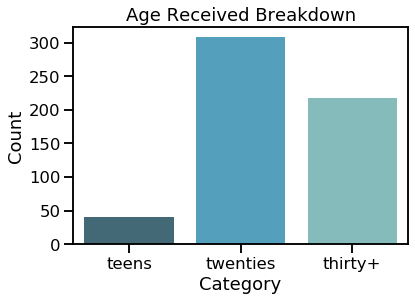

In [118]:
category_bar_plot(age_received_df, "Age Received Breakdown", 0)

In [119]:
education_level_df = get_value_counts(death_row, "education_level")
education_level_df

count         category
0    222  some_highschool
1    173       highschool
2     94    no_highschool
3     41          unknown
4     36          college

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

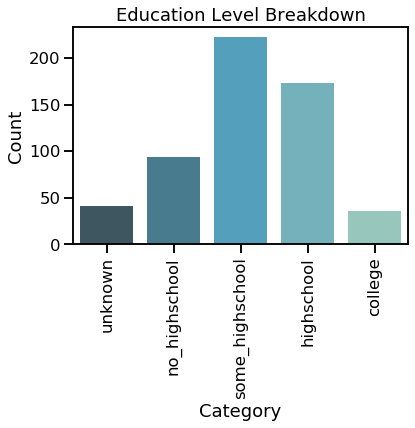

In [120]:
category_bar_plot(education_level_df, "Education Level Breakdown", 90)

In [121]:
age_crime_df = get_value_counts(death_row, "age_crime")
age_crime_df

count  category
0    299  twenties
1    180   thirty+
2     87     teens

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

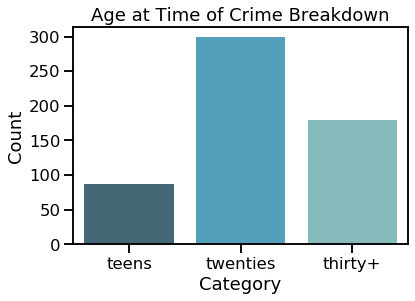

In [122]:
category_bar_plot(age_crime_df, "Age at Time of Crime Breakdown", 0)

In [123]:
occupation_df = get_value_counts(death_row, "occupation")
occupation_df

count category
0    360    other
1    206  laborer

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

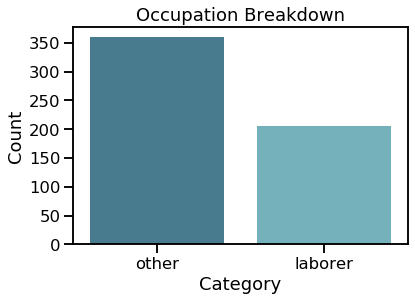

In [124]:
category_bar_plot(occupation_df, "Occupation Breakdown", 0)

In [125]:
prior_record_df = get_value_counts(death_row, "prior_record")
prior_record_df

count category
0    298      yes
1    254       no
2     14  unknown

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

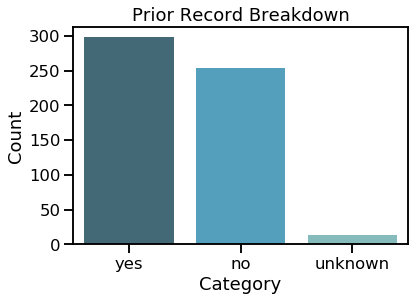

In [126]:
category_bar_plot(prior_record_df, "Prior Record Breakdown", 0)

In [127]:
num_of_vic_df = get_value_counts(death_row, "num_of_vic")
num_of_vic_df

count category
0    354      one
1    212     two+

In [128]:
category_bar_plot(num_of_vic_df, "Number of Crimes Breakdown", 0)

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [129]:
main_crime_df = get_value_counts(death_row, "main_crime")
main_crime_df

count             category
0    263       murder_robbery
1    118               murder
2     87          murder_rape
3     54         murder_other
4     44  murder_rape_robbery

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

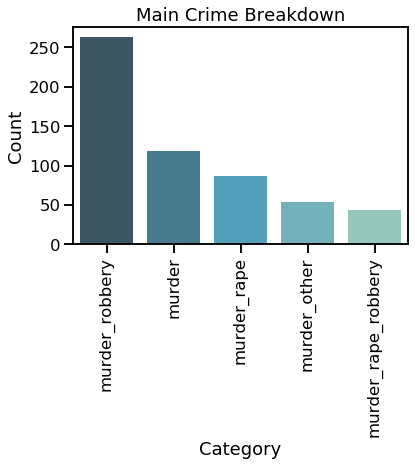

In [130]:
category_bar_plot(main_crime_df, "Main Crime Breakdown", 90)

In [131]:
type_of_crime_df = get_value_counts(death_row, "type_of_crime")
type_of_crime_df

count category
0    324      gun
1    242    other

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

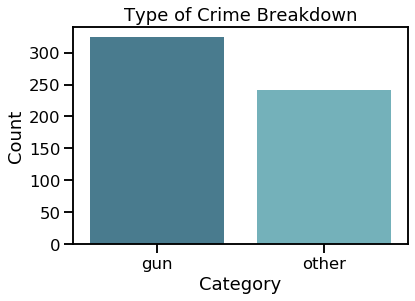

In [132]:
category_bar_plot(type_of_crime_df, "Type of Crime Breakdown", 0)

In [133]:
weapon_df = get_value_counts(death_row, "weapon")
weapon_df

count category
0    324      gun
1    128    other
2    114    knife

In [134]:
category_bar_plot(weapon_df, "Main Weapon Breakdown", 0)

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [135]:
co_defendants_df = get_value_counts(death_row, "co_defendants")
co_defendants_df

count category
0    328       no
1    238      yes

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

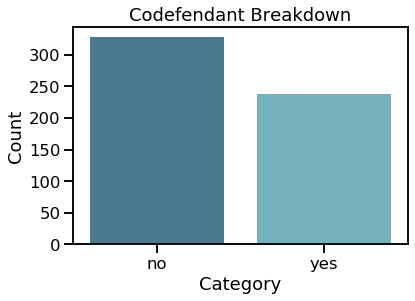

In [136]:
category_bar_plot(co_defendants_df, "Codefendant Breakdown", 0)

In [137]:
race_vic_df = get_value_counts(death_row, "race_vic")
race_vic_df

count   category
0    299      white
1    110    unknown
2     86  hispanic 
3     59      black
4     12      other

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

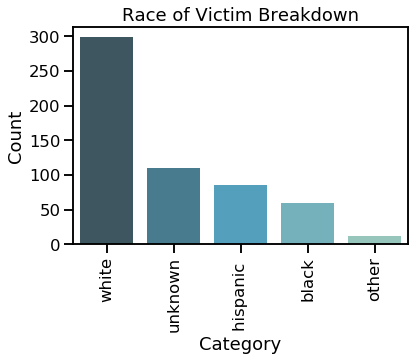

In [138]:
category_bar_plot(race_vic_df, "Race of Victim Breakdown", 90)

In [139]:
vic_kid_df = get_value_counts(death_row, "vic_kid")
vic_kid_df

count category
0    460       no
1    106      yes

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

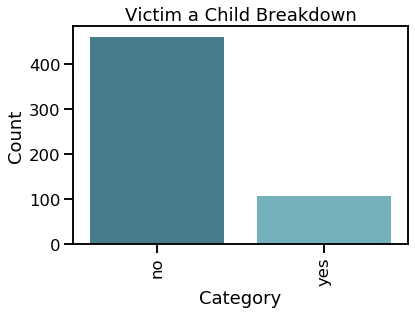

In [140]:
category_bar_plot(vic_kid_df, "Victim a Child Breakdown", 90)

In [141]:
vic_male_df = get_value_counts(death_row, "vic_male")
vic_male_df

count category
0    356      yes
1    210       no

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

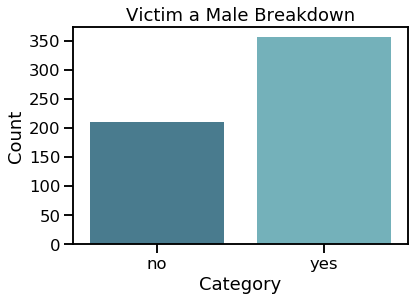

In [142]:
category_bar_plot(vic_male_df, "Victim a Male Breakdown", 0)

In [143]:
vic_female_df = get_value_counts(death_row, "vic_female")
vic_female_df

count category
0    329      yes
1    237       no

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

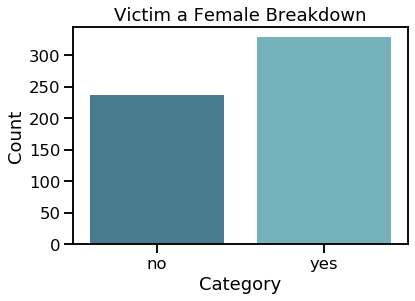

In [144]:
category_bar_plot(vic_female_df, "Victim a Female Breakdown", 0)

In [145]:
vic_police_df = get_value_counts(death_row, "vic_police")
vic_police_df

count category
0    513       no
1     53      yes

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

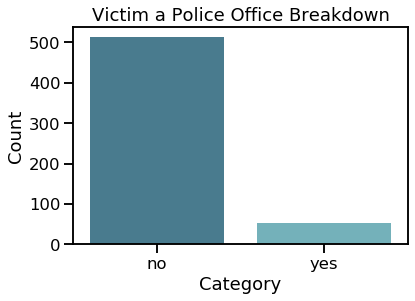

In [146]:
category_bar_plot(vic_police_df, "Victim a Police Office Breakdown", 0)

In [147]:
age_df = get_value_counts(death_row, "age")
age_df

count category
0    245    35-45
1    188    18-34
2    133      45+

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

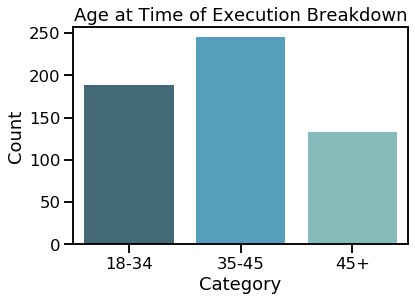

In [148]:
category_bar_plot(age_df, "Age at Time of Execution Breakdown", 0)

In [149]:
race_df = get_value_counts(death_row, "race")
race_df

count  category
0    252     white
1    204     black
2    108  hispanic
3      2     other

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

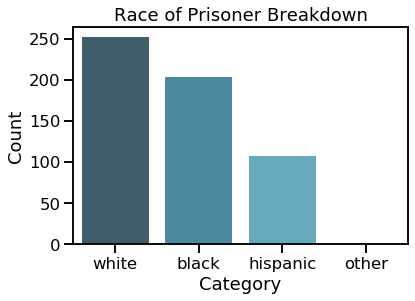

In [150]:
category_bar_plot(race_df, "Race of Prisoner Breakdown", 0)

In [151]:
county_df = get_value_counts(death_row, "county")
county_df.head(10)

count    category
0    128      Harris
1     59      Dallas
2     46       Bexar
3     42     Tarrant
4     15  Montgomery
5     14   Jefferson
6     13      Nueces
7     12     Lubbock
8     11      Brazos
9     11       Smith

In [152]:
time_spent_df = get_value_counts(death_row, "time_spent")
time_spent_df

count    category
0    284         10+
1    281  10_or_less

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

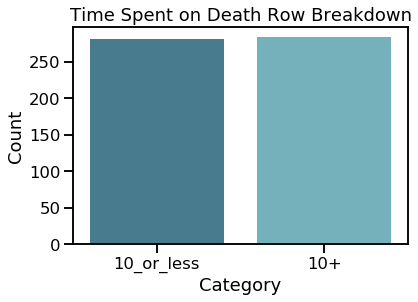

In [153]:
category_bar_plot(time_spent_df, "Time Spent on Death Row Breakdown", 0)

## Visualizing the last statements 

In [154]:
from collections import Counter 
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [168]:
#What the function does: to be creating a list of reviews, then joining the reviews together to a string and 
                         #getting a count for each word in the string
#Input: df and column 
#Output: a dictionary with each word and the count of the word
def creating_freq_list_from_df_to_dict(df, column):
    reviews = df[column].tolist() 
    review_string = " ".join(reviews)
    review_string = review_string.split()
    review_dict = Counter(review_string)
    return review_dict

In [156]:
#What the function does: creates a word cloud that is in the shape of the mask passed in
#Input: the location where the mask image is saved, the frequency word dictionary, and the max # of words to include
        #and the title of the plot 
def create_word_cloud_with_mask(path_of_mask_image, dictionary, 
                                max_num_words, title):
        mask = np.array(Image.open(path_of_mask_image))
        #creating the word cloud 
        word_cloud = WordCloud(background_color = "white", 
                               max_words = max_num_words, 
                              mask = mask, max_font_size = 125)
        word_cloud.generate_from_frequencies(dictionary)
        #creating the coloring for the word cloud 
        image_colors = ImageColorGenerator(mask)
        plt.figure(figsize = [8,8])
        plt.imshow(word_cloud.recolor(color_func = image_colors), 
                  interpolation = "bilinear")
        plt.title(title)
        sns.set_context("poster")
        plt.axis("off")
        return plt

In [157]:
#What the function does: creates a df with two columns: word and count of the top 12 words
#Input: the word frequency dictionary 
#Output: a df with the top x words 
def word_freq_dict_to_df_top_words(dictionary, number_of_words_wanted): 
    df = pd.DataFrame.from_dict(dictionary,orient='index')
    df.columns = ["count"]
    df["word"] = df.index
    df.reset_index(drop = True, inplace = True)
    df.sort_values(by=["count"], ascending = False, inplace = True)
    df = df[:number_of_words_wanted]
    return(df)

In [158]:
#What the function does: creates a bar graph
#Input: the df and title of the graph 
#Output: the bar graph
def top_words_bar_plot(df, title): 
    with sns.plotting_context("talk"):
        graph = sns.barplot(y = "count", x = "word", data = df, 
                           palette = "GnBu_d")
        plt.title(title)
        plt.xlabel("Word")
        plt.ylabel("Count")
        plt.xticks(rotation = 90)
        return plt

In [159]:
#What the function does: creates a df with two columns: word and count 
#Input: the word frequency dictionary 
#Output: a df
def word_freq_dict_to_df_all_words(dictionary): 
    df = pd.DataFrame.from_dict(dictionary,orient='index')
    df.columns = ["count"]
    df["word"] = df.index
    df.reset_index(drop = True, inplace = True)
    df.sort_values(by=["count"], ascending = False, inplace = True)
    return(df)

In [160]:
#What the function does: Returns 2 statements: One with the total number of words and the other with the number 
                        #of unique words 
#Input: the frequency count dictionary 
#output: 2 statements 
def total_words_unique_words(dictionary): 
    eda_reviews_all_words = word_freq_dict_to_df_all_words(dictionary)
    print("The total number of words is", sum(eda_reviews_all_words["count"]))
    print("The total number of unique words is", len(dictionary)) 

In [181]:
def creating_freq_list_from_df_to_dict_2(df, column):
    reviews = df[column].tolist()
    reviews = [review if (type(review) == str) else 'number' for review in reviews]
    review_string = " ".join(reviews)
#     print(review_string)
    review_string = review_string.split()
    review_dict = Counter(review_string)
    return review_dict

last_statements_dic = creating_freq_list_from_df_to_dict_2(death_row, "last_statement")

In [184]:
#http://www.transparentpng.com/details/scroll-transparent-image-_4493.html
# create_word_cloud_with_mask("scroll3.png", last_statements_dic, 750, "Word Cloud Prior to Cleaning")

In [185]:
top_words = word_freq_dict_to_df_top_words(last_statements_dic, 20)
top_words

count    word
1     3085       i
18    1608     you
3     1569      to
8     1325     and
5     1177     the
26     837      my
10     760     for
15     725    that
29     705    love
33     659     all
39     616      me
111    598      of
45     489      am
23     460    have
51     451      is
94     432       a
123    423      in
21     377      it
20     373    this
7      325  family

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

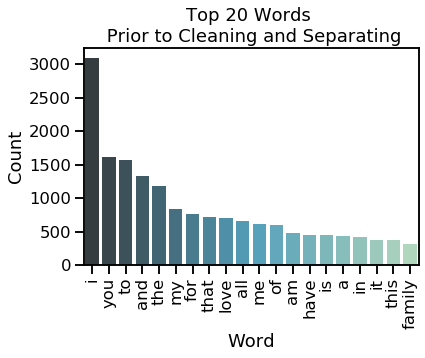

In [186]:
top_words_bar_plot(top_words, "Top 20 Words \n Prior to Cleaning and Separating")

In [187]:
total_words_unique_words(last_statements_dic)

The total number of words is 41690
The total number of unique words is 3098


It was decided to change all personal pronouns to "first_person_pronounds" and all other pronouns to "pronoun". The belief is that different types of criminal might speak of themselves versus other criminals. Punctuation will be removed prior to any changes and all words will be converted to lowercase. 

In [188]:
death_row["last_statement"] = death_row["last_statement"].str.lower()
death_row["last_statement"] = death_row["last_statement"].str.replace(r"[^\w^\s]", "")
death_row["last_statement"] = death_row["last_statement"].str.replace(r"[0-9]+", "")

In [189]:
first_person_pronouns = [" i ", " me ", " mine ", " my ", " we ", " our ", " us ", " ours "]
pronouns = [" you ", " he ", " she ", " it ", " they ", " him ", " her ", " them ", " your ", " yours ", " his ", " hers ", " its "]

In [190]:
for word in first_person_pronouns: 
    death_row["last_statement"] = death_row["last_statement"].str.replace(word, " first_person_pronoun ") 

In [191]:
for word in pronouns: 
    death_row["last_statement"] = death_row["last_statement"].str.replace(word, " pronoun ") 

In [194]:
last_statements_dic = creating_freq_list_from_df_to_dict_2(death_row, "last_statement")
#http://www.transparentpng.com/details/scroll-transparent-image-_4493.html
# create_word_cloud_with_mask("scroll3.png", last_statements_dic, 750, "Word Cloud Prior to Cleaning")

In [195]:
top_words = word_freq_dict_to_df_top_words(last_statements_dic, 20)
top_words

count                  word
1     4732  first_person_pronoun
18    2924               pronoun
3     1569                    to
8     1325                   and
5     1177                   the
10     760                   for
15     725                  that
27     705                  love
31     659                   all
105    598                    of
41     489                    am
22     460                  have
47     451                    is
88     432                     a
117    423                    in
20     373                  this
7      325                family
76     314                  know
135    299                    be
103    281                   not

<module 'matplotlib.pyplot' from '/Users/danielcaraway/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

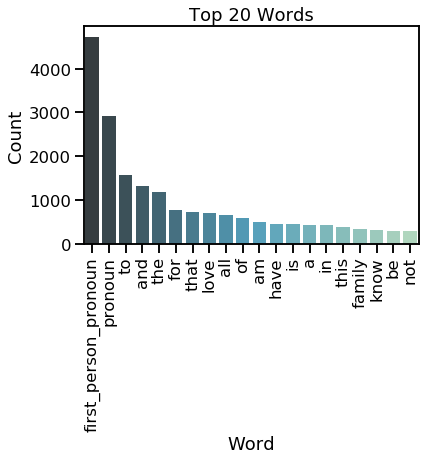

In [196]:
top_words_bar_plot(top_words, "Top 20 Words")

In [197]:
total_words_unique_words(last_statements_dic)

The total number of words is 41690
The total number of unique words is 3092


The last statements will be tokenized and any words less than 3 character will be removed. The last statements will then be stemmed using the snowball stemmer. 

In [201]:
import nltk
from nltk.stem.snowball import SnowballStemmer

def tokenize_last_statement(statement):
    try:
        return nltk.word_tokenize(statement)
    except:
        return 'error'
death_row["last_statement"] = death_row.apply(lambda row: tokenize_last_statement(row["last_statement"]), axis = 1)

In [202]:
death_row.last_statement.head(10)

0    [yeah, first_person_pronoun, want, to, address...
1    [umm, pamela, can, pronoun, hear, first_person...
2    [its, on, september, th, kayla, and, david, fi...
3    [hi, ladies, first_person_pronoun, wanted, to,...
4    [lord, forgive, pronoun, pronoun, dont, know, ...
5                                               [none]
6    [yes, sir, that, will, be, five, dollars, firs...
7    [to, first_person_pronoun, friends, and, famil...
8    [yes, sir, first_person_pronoun, would, like, ...
9    [yes, sir, dear, heavenly, father, please, for...
Name: last_statement, dtype: object

In [204]:
df

NameError: name 'df' is not defined

In [206]:
death_row.to_csv('death_row_discritized.csv', index=False)